In [1]:
## This code toggles all code cells displaying on or off, so we can see output and markdown cells only.
## All code cells display can be toggled on/off.

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
## Import all the things

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline 

# The Carpentries: Programmatic Assessment Report
## 2017 Year End and 2018 Q1

# Part 1: Workshops over time

## Workshops by Carpentry by Year

### Table: All SWC & DC workshops, 2012-2018Q1
This table lists all Software Carpentry and Data Carpentry workshops from 2012 through 2018 Q1.  Instructor training events are listed and analyzed separately.

The `slug` is a unique identifier for each workshop, taking the form `YYYY-MM-DD-sitename`.
The `workshop_type` indicates whether this is a Software Carpentry (SWC) or Data Carpentry (DC) workshop. 

In [28]:
# Load csv into df
workshops = pd.read_csv("data_files/workshops.csv")

# Clean up the tag names
workshops.loc[workshops['tag_name'].str.contains("SWC"), "workshop_type"] = "SWC"
workshops.loc[workshops['tag_name'].str.contains("DC"), "workshop_type"] = "DC"
workshops.loc[workshops['tag_name'].str.contains("LC"), "workshop_type"] = "LC"
workshops.loc[workshops['tag_name'].str.contains("TTT"), "workshop_type"] = "TTT"

workshops = workshops.drop('tag_name', axis=1)

# Clean up attendance value - this is inconsistently stored as NaN or 0
# All zero values should be NaN
workshops['attendance'] =  workshops['attendance'].replace(0.0, np.nan)

# Remove online events like maintainer onboarding 
workshops = workshops.drop(workshops[workshops.country == "W3"].index)


# Date data type
workshops['start'] = pd.to_datetime(workshops['start'])

# Remove instructor training events; these will be analyzed separately.
# Limit to non TTT workshops

workshops_nonTTT = workshops[workshops['workshop_type'] != "TTT"]
workshops_nonTTT

,slug,start,attendance,host_name,country,workshop_type
0,2012-01-18-stsci,2012-01-18,14.0,Space Telescope Science Institute,US,SWC
1,2012-02-20-itcp,2012-02-20,50.0,International Centre for Theoretical Physics,IT,SWC
2,2012-02-23-toronto,2012-02-23,28.0,University of Toronto,CA,SWC
3,2012-03-07-indiana,2012-03-07,39.0,Indiana University,US,SWC
4,2012-03-26-mbari,2012-03-26,38.0,Monterey Bay Aquarium Research Institute,US,SWC
5,2012-03-28-nersc,2012-03-28,35.0,NERSC,US,SWC
6,2012-04-02-chicago,2012-04-02,35.0,University of Chicago,US,SWC
7,2012-04-14-utahstate,2012-04-14,32.0,Utah State University,US,SWC
8,2012-04-30-ucl,2012-04-30,44.0,University College London,GB,SWC
9,2012-05-07-michiganstate,2012-05-07,55.0,Michigan State University,US,SWC


### Workshops by Carpenty by year: Table view
The table and chart below show the number of Software Carpentry and Data Carpentry workshops has remained roughly steady for the past several years.

This may not account for unreported self-organized workshops.  The Carpentries is working to improve data collection to have more accurate reflections of our scope of work.

In [29]:
workshops_by_carpentry_year = workshops_nonTTT.groupby([workshops_nonTTT['start'].dt.year, 'workshop_type'])['slug'].count().unstack()
workshops_by_carpentry_year['total'] = workshops_by_carpentry_year.sum(axis=1)
workshops_by_carpentry_year.index.values
workshops_by_carpentry_year = workshops_by_carpentry_year.rename(index = {2018:'2018Q1'})
workshops_by_carpentry_year

# Values should be ints not floats


workshop_type,DC,SWC,total
start,,,
2012,NaN,38.0,38.0
2013,NaN,93.0,93.0
2014,2.0,137.0,139.0
2015,31.0,243.0,274.0
2016,72.0,273.0,345.0
2017,81.0,256.0,337.0
2018Q1,21.0,76.0,97.0


### Workshops by Carpentry by year: Chart view

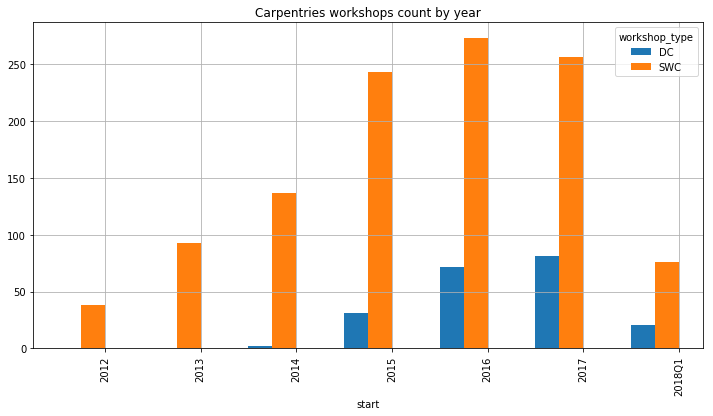

In [30]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .5
title = "Carpentries workshops count by year"
workshops_by_carpentry_year.plot(y = ["DC", "SWC"], kind='bar', ax=ax, width=width, position=1, title=title)

ax.grid(True)

plt.show()

## Workshops by Carpentry by Year and Country
The table and chart below show a count of the number of Carpentry workshops (SWC or DC) that took place in each country each year.

### Table: Count Total SWC and DC workshops by year and country

In [31]:
workshops_by_country_year = workshops_nonTTT.groupby(['country', workshops_nonTTT['start'].dt.year])['slug'].count().unstack()
workshops_by_country_year = workshops_by_country_year.fillna(0)
workshops_by_country_year.rename(columns={2018: '2018Q1'}, inplace=True)
workshops_by_country_year['total'] = workshops_by_country_year.sum(axis=1)
workshops_by_country_year

# Values should be ints not floats

start,2012,2013,2014,2015,2016,2017,2018Q1,total
country,,,,,,,,
AU,0.0,6.0,10.0,32.0,41.0,33.0,6.0,128.0
BE,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
BR,0.0,0.0,6.0,5.0,5.0,0.0,0.0,16.0
BW,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
CA,8.0,11.0,22.0,25.0,41.0,29.0,4.0,140.0
CH,0.0,0.0,2.0,4.0,5.0,2.0,1.0,14.0
CN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
CO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
CY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Chart: Count Total SWC and DC workshops by country by year
*How can we make this chart easier to read?*

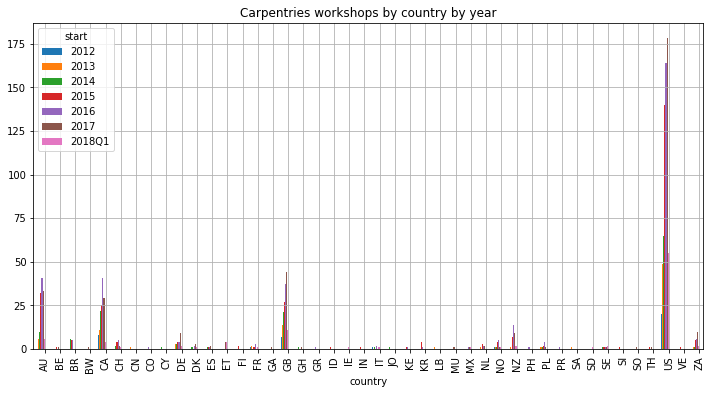

[2012, 2013, 2014, 2015, 2016, 2017, '2018Q1', 'total']

In [32]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries workshops by country by year"
workshops_by_country_year.plot(y = list(workshops_by_country_year)[:-1], kind='bar', ax=ax, position=1, title=title)

ax.grid(True)

plt.show()

list(workshops_by_country_year)

### Compare Q1 2017 and Q1 2018 Workshops by country: table view

The table and chart below show the number of workshops in each country for the first quarters of 2017 and 2018.  Most countries saw an increase in the number of workshops run. However, Australia, Canada, and New Zealand all reported decreases.

In [8]:
# # Get all workshops for 2017 Q1
workshops_2017Q1 = workshops_nonTTT[(workshops_nonTTT['start'].dt.year == 2017) & (workshops_nonTTT['start'].dt.month <= 3)]

# # Get all workshops for 2018 Q1
workshops_2018Q1 = workshops_nonTTT[(workshops_nonTTT['start'].dt.year == 2018) & (workshops_nonTTT['start'].dt.month <= 3)]

# 2017 Q1 workshops by country
workshops_by_country_year_2017Q1 = workshops_2017Q1.groupby(['country', workshops_nonTTT['start'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2017Q1.rename(columns={2017:'2017Q1'}, inplace=True)

# 2018 Q1 workshops by country
workshops_by_country_year_2018Q1 = workshops_2018Q1.groupby(['country', workshops_nonTTT['start'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2018Q1.rename(columns={2018:'2018Q1'}, inplace=True)

# Concatenated table, 2017 Q1 and 2018 Q1 workshops by country
workshops_by_country_year_1718Q1 = pd.concat([workshops_by_country_year_2017Q1, workshops_by_country_year_2018Q1], axis=1)

workshops_by_country_year_1718Q1
# Values should be ints not floats

start,2017Q1,2018Q1
AU,9.0,6.0
CA,10.0,4.0
CH,NaN,1.0
DE,2.0,2.0
DK,NaN,1.0
ET,NaN,4.0
FR,NaN,1.0
GB,9.0,11.0
IE,NaN,1.0
IT,NaN,1.0


### Compare Q1 2017 and Q1 2018 Workshops by country: chart view

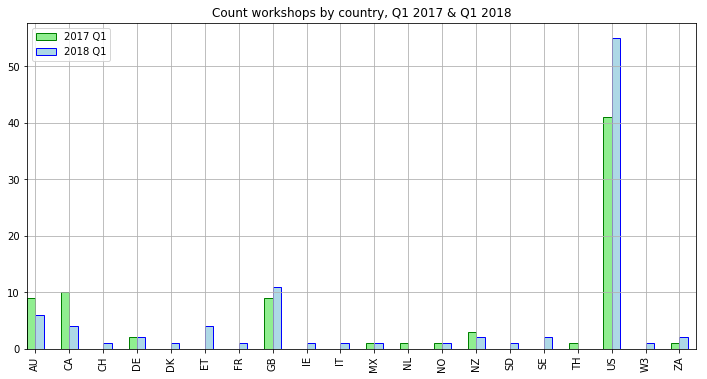

In [9]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.25

workshops_by_country_year_1718Q1['2017Q1'].plot(kind='bar', color='lightgreen', ax=ax, width=width, position=1, edgecolor = 'green',  linewidth = 1)
workshops_by_country_year_1718Q1['2018Q1'].plot(kind='bar', color='lightblue', ax=ax, width=width, position=0, edgecolor = 'blue',  linewidth = 1)

ax.legend(["2017 Q1", "2018 Q1"]);

# ax.set_xticklabels(workshops_by_country_2018_Q1_all_countries.country)
ax.grid(True)

plt.title("Count workshops by country, Q1 2017 & Q1 2018")

plt.show()

### Proportion of 2017 workshops that were in 2017 Q1
Rather than comparing 2017 Q1 and 2017 Q1, can we compare all 2017 and projected 2018?  This value is very close to 25%. 

In [10]:
total2017 = workshops_nonTTT[workshops_nonTTT['start'].dt.year == 2017]
Q1_2017 = total2017[total2017['start'].dt.month <= 3]

total2017_count = len(total2017)
Q1_2017_count = len(Q1_2017)


Q1_2017_proportion = Q1_2017_count/total2017_count
Q1_2017_proportion


0.2344213649851632

### When did each country have its first workshop?

Data goes back to 2012; some countries may have been holding Carpentries workshops before this time.

In [60]:
w2 = workshops_by_country_year.copy()

# See https://stackoverflow.com/questions/31828240/first-non-null-value-per-row-from-a-list-of-pandas-columns
# and
# https://stackoverflow.com/questions/38467749/find-first-non-zero-value-in-each-row-of-pandas-dataframe

# Fill zero values with Nan to make them non valid values
res = w2[w2 != 0.0]

first_workshop = res.apply(pd.Series.first_valid_index, axis=1)
first_workshop = first_workshop.to_frame('year')
first_workshop





,year
country,
AU,2013
BE,2015
BR,2014
BW,2017
CA,2012
CH,2014
CN,2013
CO,2016
CY,2014


### How many countries had their first workshop each year?
This table should be sorted by year.

In [63]:
pd.value_counts(first_workshop['year'].values, sort=False).to_frame()

,0
2016,5
2017,5
2018Q1,2
2012,6
2013,9
2014,8
2015,9


### Which countries had their first workshop in 2017?


In [69]:
first_workshop_2017 = first_workshop[first_workshop.year == 2017]
first_workshop_2017

,year
country,
BW,2017
ET,2017
GA,2017
MU,2017
SO,2017


## Attendance at workshops

### Workshops missing attendance

This is a full list of all workshops that did not report attendance back to the Carpentries.

In [13]:
missing_attendance = workshops_nonTTT[pd.isnull(workshops['attendance'])]
missing_attendance

/home/maneesha/.virtualenvs/surveys/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,slug,start,attendance,host_name,country,workshop_type
196,2014-06-02-icl-geo,2014-06-02,NaN,Imperial College London,GB,SWC
379,2015-05-26-amnh,2015-05-26,NaN,American Museum of Natural History,US,SWC
383,2015-05-28-monsanto,2015-05-28,NaN,Monsanto,US,SWC
396,2015-06-10-sgpe,2015-06-10,NaN,University of Edinburgh,GB,SWC
415,2015-06-25-PNW,2015-06-25,NaN,University of Oregon,US,DC
452,2015-08-19-zurich,2015-08-19,NaN,University of Zurich,CH,DC
459,2015-08-24-isu,2015-08-24,NaN,Iowa State University,US,DC
490,2015-09-23-gfz-potsdam,2015-09-23,NaN,GFZ Potsdam,DE,SWC
518,2015-10-21-gfz-potsdam,2015-10-21,NaN,GFZ Potsdam,DE,SWC
527,2015-11-02-DC-Brussels,2015-11-02,NaN,Belgian Science Policy (BELSPO),BE,DC


### Scatter plot showing frequency of attendance rates

Each dot represents the total attendance for one workshop.

Would like to add jitter to better visualize high frequencies in middle ranges.  Also overlay mean, median, or mode for each year to show shift in measures of central tendancy.

/home/maneesha/.virtualenvs/surveys/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


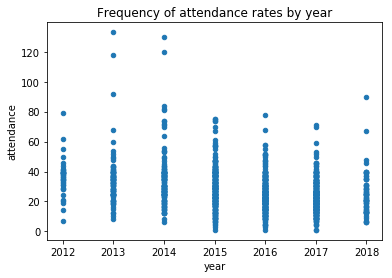

In [70]:
attendance = workshops_nonTTT[['start', 'attendance']]   #df['date'].dt.year
attendance['year'] = attendance['start'].dt.year
title = "Frequency of attendance rates by year"
attendance.plot.scatter('year', 'attendance', title=title)

### Total attendance by year: Table view

In [71]:
total_attendance_by_year = attendance.groupby('year')['attendance'].sum().to_frame()
total_attendance_by_year

,attendance
year,
2012,1378.0
2013,3212.0
2014,4742.0
2015,7755.0
2016,7133.0
2017,7223.0
2018,1735.0


### Total attendance by year: Chart view

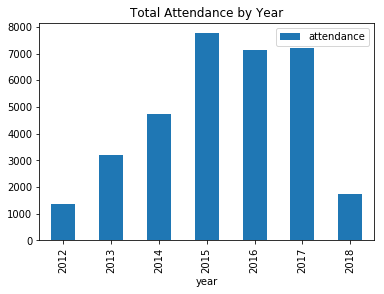

In [72]:
total_attendance_by_year.plot.bar(title="Total Attendance by Year")

### Binned attendance by year

This table shows by year, how many workshops had 1-10 learners, 11-20 learners, and so on.  Need to change the column heading 2018 to 2018Q1

In [73]:
bins = pd.cut(attendance['attendance'], [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf])
attendance.groupby(bins)['attendance'].agg(['count'])

binned_attendance_by_year = attendance.groupby([ bins, 'year'])['attendance'].agg(['count'])

binned_attendance_by_year =  binned_attendance_by_year.unstack()
binned_attendance_by_year['total'] = binned_attendance_by_year.sum(axis=1)

binned_attendance_by_year
# Values should all be ints, not floats

count                                        total
year        2012  2013  2014  2015   2016   2017  2018       
attendance                                                   
(1, 10]      1.0   2.0   2.0  16.0   23.0   22.0   6.0   72.0
(10, 20]     3.0  12.0  23.0  50.0   85.0  113.0  21.0  307.0
(20, 30]     5.0  25.0  46.0  83.0  112.0  109.0  23.0  403.0
(30, 40]    20.0  37.0  41.0  69.0   52.0   51.0  15.0  285.0
(40, 50]     6.0  10.0  11.0  29.0    9.0    9.0   2.0   76.0
(50, 60]     1.0   3.0   4.0   7.0    7.0    3.0   NaN   25.0
(60, 70]     1.0   1.0   2.0   3.0    1.0    1.0   1.0   10.0
(70, 80]     1.0   NaN   4.0   4.0    1.0    1.0   NaN   11.0
(80, 90]     NaN   NaN   3.0   NaN    NaN    NaN   1.0    4.0
(90, 100]    NaN   1.0   NaN   NaN    NaN    NaN   NaN    1.0
(100, inf]   NaN   2.0   2.0   NaN    NaN    NaN   NaN    4.0

## Instructor Training

This tables lists all instructor training events the Carpentries has held since 2012. The "count_badged" column is a total of all individuals from that event with at least one badge.

In [74]:
badges_by_training_event = pd.read_csv("data_files/badges_by_training_event.csv")

badges_by_training_event['pct_completion'] = badges_by_training_event['count_badged'] / badges_by_training_event['attendance'] * 100
badges_by_training_event = badges_by_training_event.round({'pct_completion':1})
badges_by_training_event['start'] = pd.to_datetime(badges_by_training_event['start'])


badges_by_training_event

,count_badged,slug,attendance,country,start,pct_completion
0,17,2012-08-26-ttt-online,20,W3,2012-08-26,85.0
1,19,2012-10-11-ttt-online,25,W3,2012-10-11,76.0
2,5,2013-01-06-ttt-online,12,W3,2013-01-06,41.7
3,18,2013-03-12-ttt-online,27,W3,2013-03-12,66.7
4,18,2013-05-12-ttt-online,45,W3,2013-05-12,40.0
5,24,2013-08-12-ttt-online,41,W3,2013-08-12,58.5
6,22,2013-09-30-ttt-online,57,W3,2013-09-30,38.6
7,25,2014-01-16-ttt-online,67,W3,2014-01-16,37.3
8,3,2014-04-14-ttt-pycon,34,W3,2014-04-14,8.8
9,24,2014-04-24-ttt-online,58,W3,2014-04-24,41.4


### Number of instructor training events by country

In [75]:
trainigs_by_country = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['slug'].count().unstack()
trainigs_by_country['total'] = trainigs_by_country.sum(axis=1)
trainigs_by_country.index.values
trainigs_by_country = trainigs_by_country.rename(index = {2018:'2018Q1'})
trainigs_by_country

country,AU,CA,CH,GB,NL,NO,NZ,PL,PR,US,W3,ZA,total
start,,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,10.0
2015,NaN,1.0,NaN,4.0,NaN,NaN,NaN,1.0,NaN,3.0,12.0,NaN,21.0
2016,2.0,1.0,1.0,3.0,NaN,1.0,3.0,NaN,NaN,12.0,11.0,1.0,35.0
2017,3.0,1.0,NaN,4.0,1.0,NaN,1.0,NaN,1.0,13.0,21.0,2.0,47.0
2018Q1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,1.0,11.0


### Binned completion rates for instructor training events by year

In [76]:
bins = pd.cut(badges_by_training_event['pct_completion'], [0, 25, 50, 75, 99, 100])
binned_badges_by_year = badges_by_training_event.groupby([ bins, badges_by_training_event['start'].dt.year])['pct_completion'].agg(['count'])

binned_badges_by_year =  binned_badges_by_year.unstack()
binned_badges_by_year['total'] = binned_badges_by_year.sum(axis=1)

binned_badges_by_year

# Need to add total row
# Need to remove 2018 (even Q1 - none of these people are expected to be badged)
# Values should all be ints, not floats
# Table reads "6 events in 2016 had a completion rate under 25%"


count                                 total
start           2012 2013 2014 2015  2016  2017 2018      
pct_completion                                            
(0, 25]          NaN  NaN  2.0  1.0   6.0   3.0  6.0  18.0
(25, 50]         NaN  3.0  5.0  8.0  18.0  18.0  2.0  54.0
(50, 75]         NaN  2.0  3.0  8.0   8.0  22.0  3.0  46.0
(75, 99]         2.0  NaN  NaN  3.0   3.0   3.0  NaN  11.0
(99, 100]        NaN  NaN  NaN  1.0   NaN   1.0  NaN   2.0

### Attendance and number badged by year

#### Total attendance by year

In [77]:
attendance_by_year = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['attendance'].sum().unstack()
attendance_by_year

# trainigs_by_country = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['slug'].count().unstack()


country,AU,CA,CH,GB,NL,NO,NZ,PL,PR,US,W3,ZA
start,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.0,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0,NaN
2015,NaN,22.0,NaN,75.0,NaN,NaN,NaN,13.0,NaN,76.0,393.0,NaN
2016,52.0,27.0,20.0,62.0,NaN,22.0,41.0,NaN,NaN,211.0,206.0,23.0
2017,57.0,23.0,NaN,83.0,16.0,NaN,28.0,NaN,12.0,189.0,359.0,62.0
2018,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,117.0,17.0


#### Total badged by year

In [78]:
badges_by_year = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['count_badged'].sum().unstack()
badges_by_year


country,AU,CA,CH,GB,NL,NO,NZ,PL,PR,US,W3,ZA
start,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,NaN
2015,NaN,16.0,NaN,35.0,NaN,NaN,NaN,3.0,NaN,34.0,248.0,NaN
2016,28.0,21.0,17.0,22.0,NaN,10.0,21.0,NaN,NaN,92.0,92.0,11.0
2017,28.0,10.0,NaN,46.0,6.0,NaN,14.0,NaN,2.0,109.0,189.0,23.0
2018,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,41.0,9.0


#### Percent of trainees badged per year
Note the country data shows the country the event was held in, not the country the trainee is based in.  The year is the year the event was held, not the year the badge was issued.

In [79]:
percent_badged_by_year = badges_by_year/attendance_by_year*100
percent_badged_by_year = percent_badged_by_year.round(1)
percent_badged_by_year

country,AU,CA,CH,GB,NL,NO,NZ,PL,PR,US,W3,ZA
start,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.8,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.6,NaN
2015,NaN,72.7,NaN,46.7,NaN,NaN,NaN,23.1,NaN,44.7,63.1,NaN
2016,53.8,77.8,85.0,35.5,NaN,45.5,51.2,NaN,NaN,43.6,44.7,47.8
2017,49.1,43.5,NaN,55.4,37.5,NaN,50.0,NaN,16.7,57.7,52.6,37.1
2018,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.8,35.0,52.9


### Comparison:  Inperson vs Online Training Events
#### Number of events per year

In [80]:
# In person training events

countries = list(trainigs_by_country)
countries.remove('W3')
countries.remove('total')
inperson_trainings = trainigs_by_country[countries].sum(axis = 1).to_frame()

online_trainings = trainigs_by_country[['W3']]

trainings_online_inperson = pd.concat([inperson_trainings, online_trainings], axis=1)

trainings_online_inperson.rename(columns = {0:'in-person', 'W3':'online'}, inplace=True)

trainings_online_inperson


,in-person,online
start,,
2012,NaN,2.0
2013,NaN,5.0
2014,NaN,10.0
2015,9.0,12.0
2016,24.0,11.0
2017,26.0,21.0
2018Q1,4.0,7.0


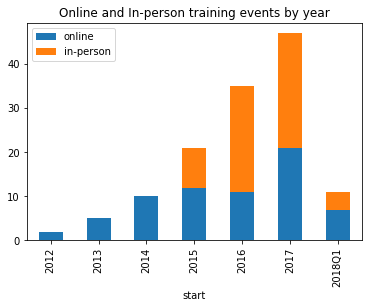

In [81]:
title = "Online and In-person training events by year"
trainings_online_inperson[['online','in-person']].plot(kind='bar', stacked=True, title=title)